In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [2]:
df = pd.read_csv("cleaned_final.csv")
df.head()

,Дата,Коррупция,Взятка,приговор,дело,Хищение,расследование,Задержание,Получение,Преступление,...,судебный,процесс,аким,начальник,заместитель,район,город,область,правонарушение,Всего коррупционных преступлений
0,2016-12-01,8.0,3.0,4.0,13,1.0,4.0,3.0,1,2.0,...,1.0,2.0,4.0,1.0,3.0,1.0,1.0,3.0,2.0,3214
1,2017-01-01,41.0,29.0,1.0,30,1.0,14.0,16.0,21,4.0,...,7.0,4.0,9.0,5.0,16.0,13.0,3.0,14.0,2.0,1137
2,2017-02-01,24.0,16.0,15.0,55,19.0,16.0,10.0,15,10.0,...,2.0,1.0,3.0,6.0,3.0,3.0,9.0,14.0,3.0,1337
3,2017-03-01,33.0,26.0,10.0,73,24.0,26.0,8.0,17,30.0,...,12.0,4.0,13.0,2.0,18.0,17.0,12.0,23.0,7.0,1566
4,2017-04-01,42.0,22.0,4.0,48,13.0,10.0,1.0,15,11.0,...,12.0,3.0,2.0,10.0,18.0,2.0,9.0,18.0,5.0,1802


In [3]:
df["Дата"] = pd.to_datetime(df["Дата"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Дата                              88 non-null     datetime64[ns]
 1   Коррупция                         88 non-null     float64       
 2   Взятка                            88 non-null     float64       
 3   приговор                          88 non-null     float64       
 4   дело                              88 non-null     int64         
 5   Хищение                           88 non-null     float64       
 6   расследование                     88 non-null     float64       
 7   Задержание                        88 non-null     float64       
 8   Получение                         88 non-null     int64         
 9   Преступление                      88 non-null     float64       
 10  миллиард                          88 non-null     fl

In [5]:
df.tail()

,Дата,Коррупция,Взятка,приговор,дело,Хищение,расследование,Задержание,Получение,Преступление,...,судебный,процесс,аким,начальник,заместитель,район,город,область,правонарушение,Всего коррупционных преступлений
83,2024-07-01,28.0,24.0,29.0,49,30.0,26.0,7.0,20,3.0,...,9.0,5.0,7.0,12.0,7.0,2.0,3.0,31.0,6.0,1200
84,2024-08-01,10.0,16.0,20.0,23,10.0,10.0,2.0,6,5.0,...,7.0,5.0,5.0,3.0,7.0,7.0,4.0,19.0,5.0,1246
85,2024-09-01,20.0,16.0,14.0,32,12.0,2.0,13.0,12,4.0,...,4.0,6.0,23.0,3.0,9.0,13.0,6.0,22.0,3.0,1300
86,2024-10-01,21.0,13.0,3.0,29,5.0,7.0,1.0,9,3.0,...,4.0,4.0,7.0,4.0,4.0,9.0,7.0,18.0,4.0,1358
87,2024-11-01,11.0,26.0,15.0,12,4.0,16.0,5.0,13,3.0,...,4.0,1.0,6.0,14.0,2.0,6.0,5.0,25.0,7.0,1415


Корреляция с целевой переменной:
Всего коррупционных преступлений    1.000000
Преступление                        0.249795
Коррупция                           0.243810
Получение                           0.168645
расследование                       0.146811
город                               0.140829
заместитель                         0.136782
область                             0.110399
аким                                0.100121
район                               0.099279
дело                                0.096394
Взятка                              0.076197
начальник                           0.075152
миллион                             0.043835
приговор                            0.012539
Хищение                            -0.002762
Задержание                         -0.022683
судебный                           -0.023967
правонарушение                     -0.025228
процесс                            -0.153070
миллиард                           -0.204068
Дата                  

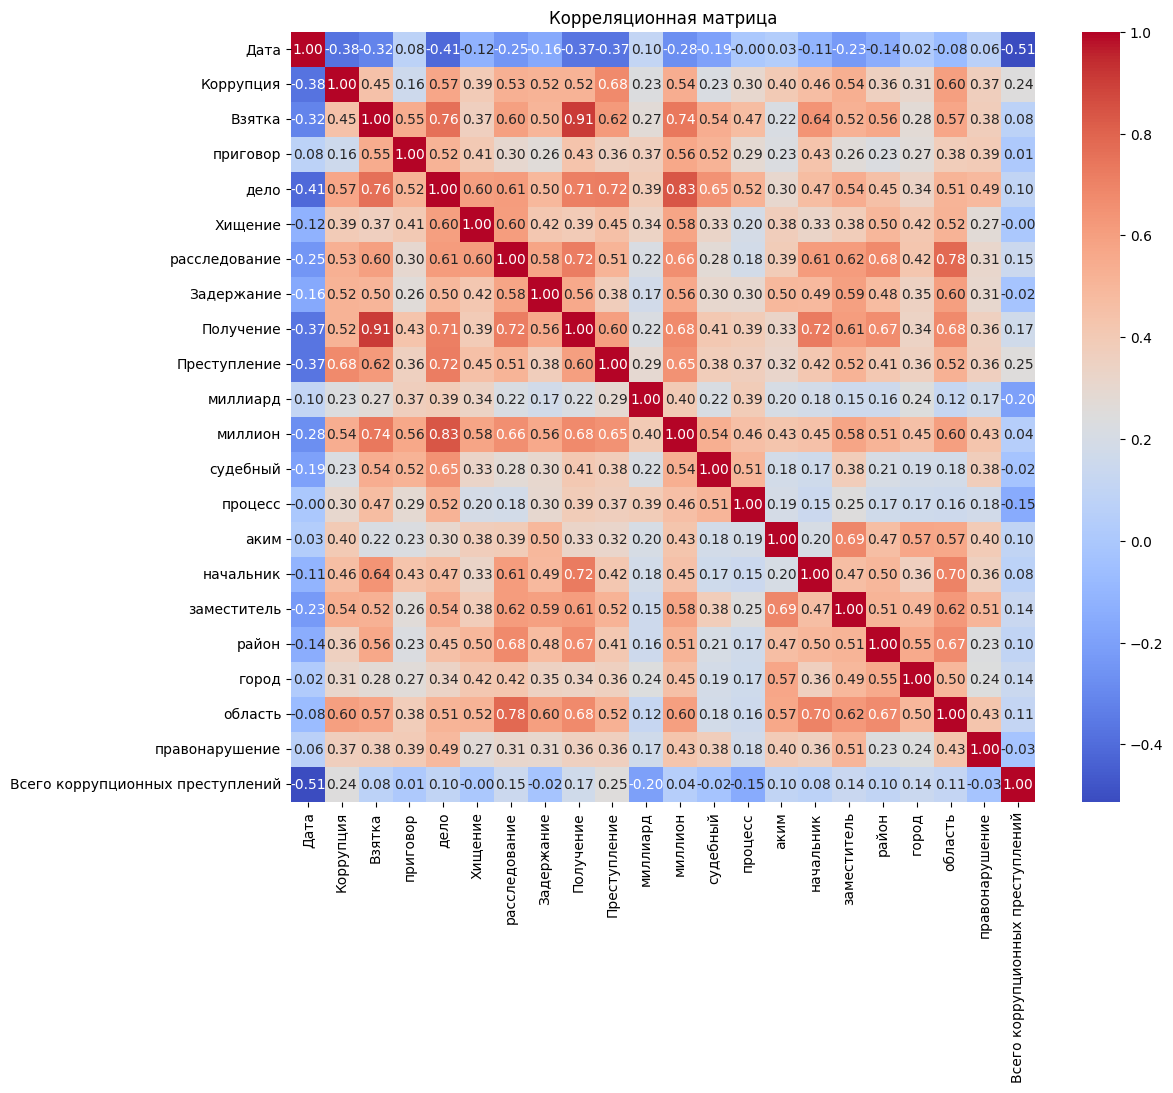

In [6]:
# Вычисляем корреляцию
correlation_matrix = df.corr()

# Выводим корреляцию целевой переменной с другими признаками
target_corr = correlation_matrix["Всего коррупционных преступлений"].sort_values(ascending=False)
print("Корреляция с целевой переменной:")
print(target_corr)

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица")
plt.show()

In [7]:
# Создаём новый датафрейм с агрегированными признаками
df_agg = pd.DataFrame()

# Агрегированные признаки
df_agg['Коррупция_сумма'] = df[['Коррупция', 'Взятка', 'Получение', 'Хищение', 'правонарушение']].sum(axis=1)
df_agg['Власть_сумма'] = df[['район', 'город', 'область', 'аким', 'начальник', 'заместитель']].sum(axis=1)
df_agg['Финансы_сумма'] = df[['миллион', 'миллиард']].sum(axis=1)

# Добавляем временные компоненты
df_agg['Месяц'] = pd.to_datetime(df['Дата']).dt.month
df_agg['Год'] = pd.to_datetime(df['Дата']).dt.year

# Целевая переменная
df_agg['Всего коррупционных преступлений'] = df['Всего коррупционных преступлений']


In [10]:
# 1. Для исходного датафрейма df
low_corr_features = ["Хищение", "судебный", "правонарушение", "приговор", "процесс"]
X_df = df.drop(columns=["Всего коррупционных преступлений", "Дата"] + low_corr_features)
y_df = df["Всего коррупционных преступлений"]

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 2. Для агрегированного датафрейма df_agg
X_agg = df_agg.drop(columns=["Всего коррупционных преступлений"])
y_agg = df_agg["Всего коррупционных преступлений"]

X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(X_agg, y_agg, test_size=0.2, random_state=42)

In [15]:
# Функция для обучения и оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
    print("-" * 30)

In [16]:
# Список моделей
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=0.1)),
    ("ElasticNet", ElasticNet(alpha=0.1, l1_ratio=0.5)),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("XGBoost Regressor", xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42))
]

In [17]:
# Обучение и оценка для df
print("Оценка моделей на df:")
for name, model in models:
    evaluate_model(model, X_train_df, X_test_df, y_train_df, y_test_df, name)

# Обучение и оценка для df_agg
print("Оценка моделей на df_agg:")
for name, model in models:
    evaluate_model(model, X_train_agg, X_test_agg, y_train_agg, y_test_agg, name)

Оценка моделей на df:
Linear Regression:
MAE: 592.65, MSE: 526130.04, R2: -0.09
------------------------------
Ridge Regression:
MAE: 592.33, MSE: 525747.53, R2: -0.08
------------------------------
Lasso Regression:
MAE: 592.60, MSE: 526054.30, R2: -0.09
------------------------------
ElasticNet:
MAE: 591.54, MSE: 524766.74, R2: -0.08
------------------------------
Random Forest Regressor:
MAE: 585.58, MSE: 466639.65, R2: 0.04
------------------------------
Gradient Boosting Regressor:
MAE: 534.77, MSE: 398756.43, R2: 0.18
------------------------------
XGBoost Regressor:
MAE: 496.80, MSE: 382289.10, R2: 0.21
------------------------------
Оценка моделей на df_agg:
Linear Regression:
MAE: 171.96, MSE: 54610.94, R2: 0.89
------------------------------
Ridge Regression:
MAE: 172.02, MSE: 54607.22, R2: 0.89
------------------------------
Lasso Regression:
MAE: 171.96, MSE: 54607.66, R2: 0.89
------------------------------
ElasticNet:
MAE: 172.62, MSE: 54617.07, R2: 0.89
-----------------

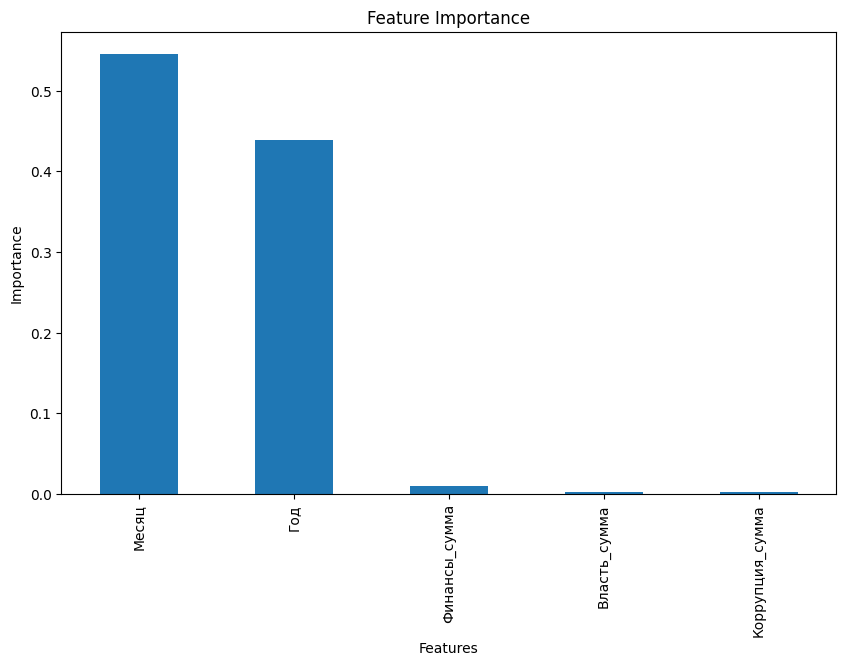

In [18]:
# Обучение модели XGBoost на агрегированных данных
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_agg, y_train_agg)

# Вычисление важности признаков
importance = pd.Series(xgb_model.feature_importances_, index=X_agg.columns)

# Сортировка и визуализация
importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), title="Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

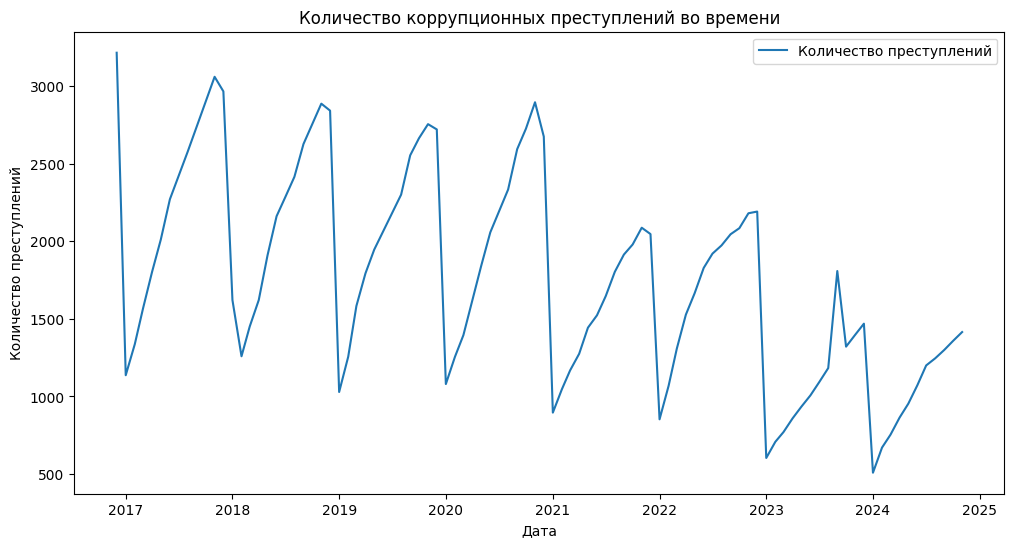

In [22]:
# Убедимся, что 'Дата' является индексом
df_agg['Дата'] = pd.to_datetime(df_agg['Год'].astype(str) + '-' + df_agg['Месяц'].astype(str))
df_agg.set_index('Дата', inplace=True)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df_agg.index, df_agg['Всего коррупционных преступлений'], label="Количество преступлений")
plt.title("Количество коррупционных преступлений во времени")
plt.xlabel("Дата")
plt.ylabel("Количество преступлений")
plt.legend()
plt.show()

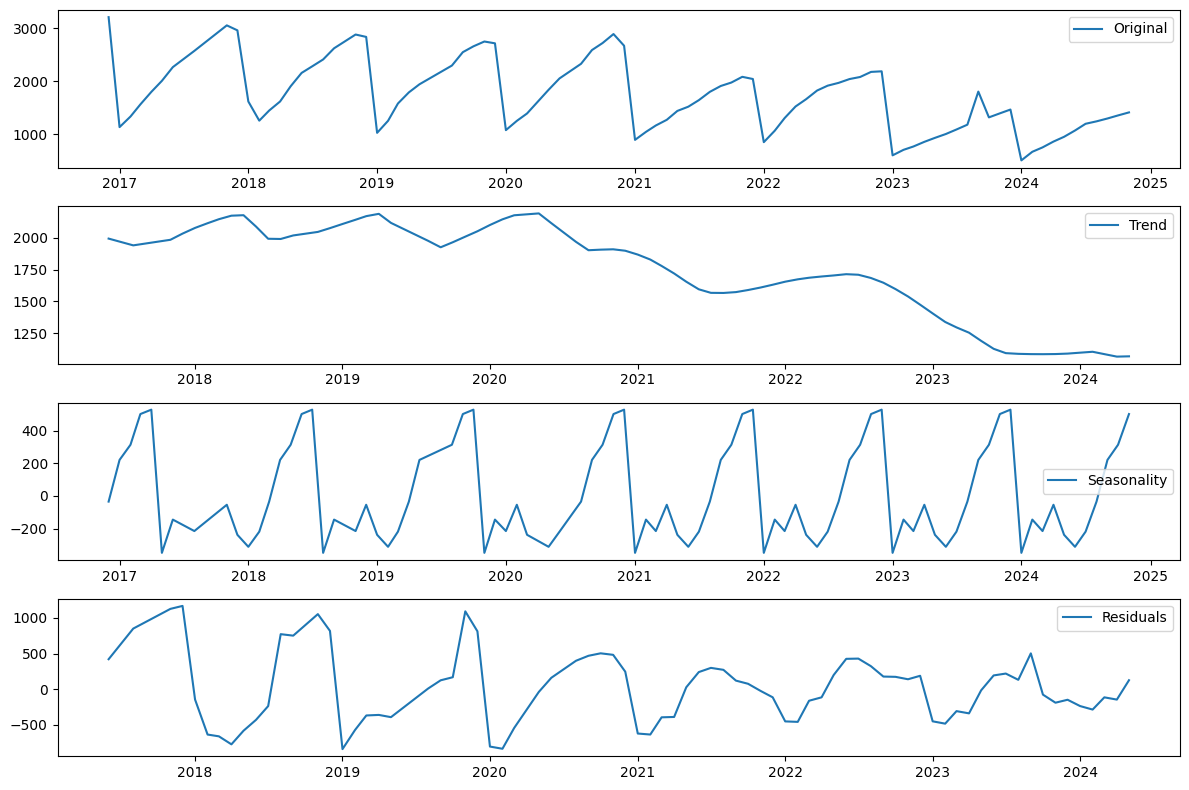

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(df_agg['Всего коррупционных преступлений'], model='additive', period=12)

# Визуализация компонентов
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_agg['Всего коррупционных преступлений'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarnin

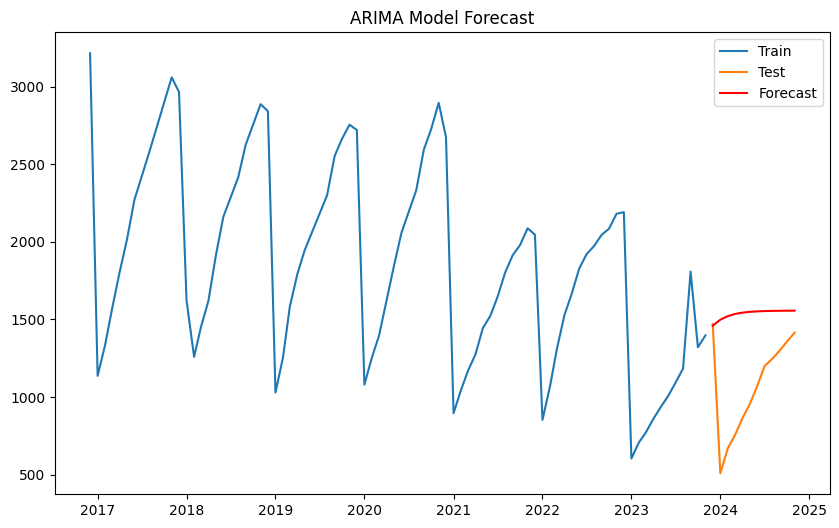

Mean Squared Error: 308358.09


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Разделяем данные на тренировочные и тестовые
train = df_agg['Всего коррупционных преступлений'][:-12]
test = df_agg['Всего коррупционных преступлений'][-12:]

# Построение модели ARIMA
model = ARIMA(train, order=(1, 1, 1))  # Параметры ARIMA(p, d, q)
model_fit = model.fit()

# Прогнозирование
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()

# Оценка качества прогноза
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")


Importing plotly failed. Interactive plots will not work.
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return

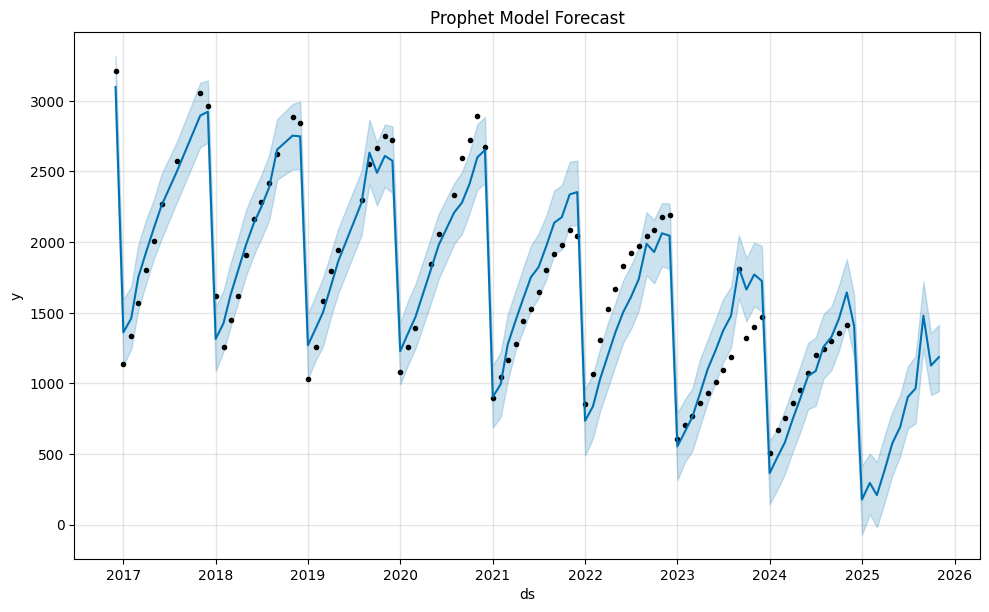

In [25]:
from prophet import Prophet

# Подготовка данных для Prophet
prophet_df = df_agg.reset_index()[['Дата', 'Всего коррупционных преступлений']]
prophet_df.columns = ['ds', 'y']  # Требования Prophet

# Обучение модели Prophet
model = Prophet()
model.fit(prophet_df)

# Прогнозирование
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Визуализация прогноза
fig = model.plot(forecast)
plt.title("Prophet Model Forecast")
plt.show()


In [28]:
# Извлекаем реальные тестовые значения (последние 12 месяцев)
test = prophet_df.iloc[-12:]  # Реальные значения
test = test.set_index('ds')

# Извлекаем предсказанные значения на тестовом периоде
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test.index]

# Вычисление метрик
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
mse = mean_squared_error(test['y'], forecast_test['yhat'])
r2 = r2_score(test['y'], forecast_test['yhat'])

# Вывод результатов
print(f"Prophet Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Prophet Metrics:
MAE: 120.54
MSE: 20609.91
R2: 0.77


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47583D+00    |proj g|=  7.80223D-02

At iterate    5    f=  6.46885D+00    |proj g|=  7.81656D-03

At iterate   10    f=  6.46873D+00    |proj g|=  1.44933D-03

At iterate   15    f=  6.42908D+00    |proj g|=  5.19739D-02

At iterate   20    f=  6.40753D+00    |proj g|=  9.45707D-03

At iterate   25    f=  6.40652D+00    |proj g|=  3.00203D-04

At iterate   30    f=  6.40161D+00    |proj g|=  3.62676D-02

At iterate   35    f=  6.39371D+00    |proj g|=  1.16388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


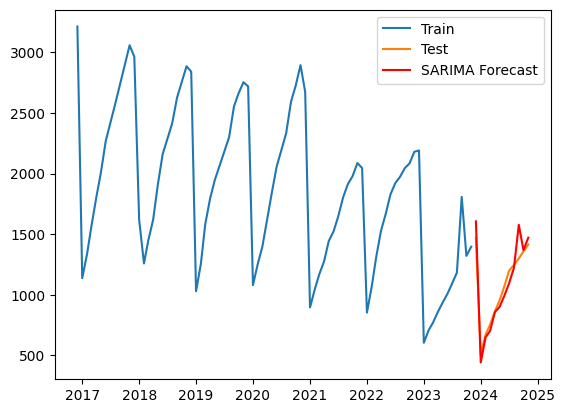

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA: Указываем сезонность period=12
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()

forecast_sarima = model_fit_sarima.forecast(steps=12)
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast_sarima, label="SARIMA Forecast", color='red')
plt.legend()
plt.show()


In [27]:
mae = mean_absolute_error(test, forecast_sarima)
mse = mean_squared_error(test, forecast_sarima)
r2 = r2_score(test, forecast_sarima)

print(f"SARIMA Metrics:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR2: {r2:.2f}")


SARIMA Metrics:
MAE: 73.97
MSE: 10594.48
R2: 0.88


In [29]:
# SARIMA прогноз на 12 месяцев вперёд
sarima_forecast = model_fit_sarima.forecast(steps=12)

# Преобразуем в DataFrame для удобства
sarima_forecast = pd.DataFrame({'Дата': pd.date_range(start=train.index[-1] + pd.offsets.MonthEnd(1), 
                                                     periods=12, freq='M'),
                                'SARIMA Forecast': sarima_forecast.values})

print(sarima_forecast)


         Дата  SARIMA Forecast
0  2023-11-30      1605.863689
1  2023-12-31       441.597849
2  2024-01-31       648.910803
3  2024-02-29       702.900280
4  2024-03-31       857.817217
5  2024-04-30       899.964154
6  2024-05-31       994.216049
7  2024-06-30      1096.208865
8  2024-07-31      1222.808460
9  2024-08-31      1577.512309
10 2024-09-30      1368.508021
11 2024-10-31      1471.222528


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/q7/8pq55_951s10gcbkq_610n9r0000gn/T/ipykernel_22042/835356587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sarima_forecast = pd.DataFrame({'Дата': pd.date_range(start=train.index[-1] + pd.offsets.MonthEnd(1),


In [30]:
# Prophet прогноз на 12 месяцев вперёд
prophet_forecast = forecast[['ds', 'yhat']].iloc[-12:]  # Последние 12 месяцев прогноза

print(prophet_forecast)


           ds         yhat
88 2024-11-30  1405.482857
89 2024-12-31   177.068278
90 2025-01-31   294.858886
91 2025-02-28   208.331656
92 2025-03-31   388.293685
93 2025-04-30   575.441949
94 2025-05-31   690.462228
95 2025-06-30   902.300227
96 2025-07-31   963.787070
97 2025-08-31  1478.983957
98 2025-09-30  1125.727946
99 2025-10-31  1185.381130
